## Project 2023

# Sissejuhatus

Teame ütlust, et ühes õiges poisslapse nimes peab olema "R"-täht. Sellest kujunes välja mõte, uurida, kas tuleb esile ka mõni täht või tähed, mis esineb enamikus tänava nimedes. Ilmselt siin võib olla ka mingi seos, et eesti keeles, esineb teatud tähti sagedamini kui teisi, aga samas võib olla tulemus ka erinev. Näiteks tänava nimedeks valitakse sõnu, kus need eesti keelele üldised reeglid tähtede esinemissagedusest ei kehti.

Antud projektis kasutame 

https://avaandmed.eesti.ee/ 

andmebaasi.
Täpsemalt oleme valinud välja:

https://avaandmed.eesti.ee/datasets/tallinna-aadresside-tabelid-asumite-kaupa

Ja veelgi täpsemalt valime sealt "Tallinna aadresside tabelid asumite kaupa 29.11.2015 10 MB (XLSX)" ehk "aadressid20151129.xlsx":

https://www.tallinn.ee/est/g21786s99123

See ei ole küll kõige uuem, kuid on kõige suurema kirjete arvuga andmebaas mis leitav antud teemal.



# Antmete puhastamine ja sorteerimine

Esialgselt on meil 272'075 kirjet. Aga meil on ühe tänava kohta mitu kirjet, näiteks iga maja number. Samas me ei soovi anda tänava nimedele erinevaid kaale meie valimis, lähtuvalt näiteks sellest, kui pikk üks või teine tänav on või kui mitu maja sellele tänavale tänase seisuga ehitatud on. Meie soov on kohelda igat tänava nime võrdselt meie valimis.

Seega viskame välja korduvad tänava nimed ja ka majanumbrid.

In [6]:
from IPython.display import display
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

import os
os.chdir(r"C:\Users\Dell\Desktop\Programeerimine\TU - Praktiline andmeteadus\Kodutood\koondtoo")

In [2]:
# Replace 'path_to_excel_file.xlsx' with the path to your Excel file
excel_file_path = 'aadressid20151129.xlsx'

# Read the Excel file into a DataFrame
dataframe = pd.read_excel(excel_file_path)

# Display the first few rows of the DataFrame
print(dataframe.head())

                                         Täisaadress        Lähiaadress  \
0  Harju maakond, Tallinn, Haabersti linnaosa, As...         Astangu tn   
1  Harju maakond, Tallinn, Haabersti linnaosa, As...       Astangu tn 1   
2  Harju maakond, Tallinn, Haabersti linnaosa, As...      Astangu tn 19   
3  Harju maakond, Tallinn, Haabersti linnaosa, As...    Astangu tn 19/1   
4  Harju maakond, Tallinn, Haabersti linnaosa, As...  Astangu tn 19/1-1   

      Asum            Linnaosa           Linn  
0  Astangu  Haabersti linnaosa  Tallinna linn  
1  Astangu  Haabersti linnaosa  Tallinna linn  
2  Astangu  Haabersti linnaosa  Tallinna linn  
3  Astangu  Haabersti linnaosa  Tallinna linn  
4  Astangu  Haabersti linnaosa  Tallinna linn  


**Salvestame selle arvuti jõudluse parandamiseks CSV formaati.**

In [3]:
# Assuming 'dataframe' is the DataFrame you want to save
# Replace 'path_to_csv_file.csv' with the path where you want to save the CSV file

csv_file_path = '001.csv'

# Save the DataFrame to a CSV file with "|" as the delimiter
dataframe.to_csv(csv_file_path, sep='|', index=False, encoding='utf-8')


# The 'index=False' argument is used to prevent pandas from writing row indices into the CSV file.


**Teeme mälu tühjaks:**

In [4]:
del dataframe


**Loeme oma CSV faili sisse ja töötleme seda natukene:**
    

In [17]:
# Replace 'path_to_csv_file.csv' with the path to your CSV file
csv_file_path = '001.csv'

# Read the CSV file into a DataFrame with "|" as the delimiter
dataframe = pd.read_csv(csv_file_path, sep='|')

# Display the first few rows of the DataFrame
print(dataframe.head())

                                         Täisaadress        Lähiaadress  \
0  Harju maakond, Tallinn, Haabersti linnaosa, As...         Astangu tn   
1  Harju maakond, Tallinn, Haabersti linnaosa, As...       Astangu tn 1   
2  Harju maakond, Tallinn, Haabersti linnaosa, As...      Astangu tn 19   
3  Harju maakond, Tallinn, Haabersti linnaosa, As...    Astangu tn 19/1   
4  Harju maakond, Tallinn, Haabersti linnaosa, As...  Astangu tn 19/1-1   

      Asum            Linnaosa           Linn  
0  Astangu  Haabersti linnaosa  Tallinna linn  
1  Astangu  Haabersti linnaosa  Tallinna linn  
2  Astangu  Haabersti linnaosa  Tallinna linn  
3  Astangu  Haabersti linnaosa  Tallinna linn  
4  Astangu  Haabersti linnaosa  Tallinna linn  


sssss

In [18]:
# List of columns to be removed
columns_to_drop = ["Täisaadress", "Asum", "Linnaosa", "Linn"]

# Drop the specified columns from the DataFrame
df_dropped = dataframe.drop(columns=columns_to_drop)

# Display the DataFrame after dropping the columns
print(df_dropped.head())

         Lähiaadress
0         Astangu tn
1       Astangu tn 1
2      Astangu tn 19
3    Astangu tn 19/1
4  Astangu tn 19/1-1


Tere

In [49]:

df = df_dropped

# Regular expression to match any digits
pattern = r'\d'

# Keep rows where 'Lähiaadress' does NOT contain any digit
df_filtered = df[~df['Lähiaadress'].str.contains(pattern, na=False)]

# Display the filtered DataFrame
print(df_filtered.head())

       Lähiaadress
0       Astangu tn
2162     Jalami tn
2246   Kotermaa tn
2271   Moonalao tn
2285  Paldiski mnt


Puhastame "tn" ja  "mnt" nime lõpust:

In [50]:
# Assuming df_filtered is a DataFrame created by filtering df

# Use regex to replace ' tn' or ' mnt' at the end of the string with an empty string
df_filtered.loc[:, 'Lähiaadress'] = df_filtered.loc[:, 'Lähiaadress'].str.replace(r'\s+(tn|mnt|tänav|põik|pst|puiestee|tee|saar|park|aas|ots|väljak|haljak|käik|õu|aed|plats|vaateplats|turg|kael|järv|jalg|maantee|liivakarjäär|umbtänav|allee|puiestik|tiik|raudteejaam)$', '', regex=True)

# Display the modified DataFrame
print(df_filtered['Lähiaadress'])

0              Astangu
2162            Jalami
2246          Kotermaa
2271          Moonalao
2285          Paldiski
              ...     
270330    Manufaktuuri
270342           Niidi
270347           Niidi
270498        Puuvilla
270698           Sitsi
Name: Lähiaadress, Length: 2152, dtype: object


In [56]:
# Use regex to replace the pattern 'single letter followed by a period and a space' with an empty string
df_filtered.loc[:, 'Lähiaadress'] = df_filtered.loc[:, 'Lähiaadress'].str.replace(r'\b\w\. ', '', regex=True)

# Display the modified DataFrame
print(df_filtered['Lähiaadress'])

0              Astangu
2162            Jalami
2246          Kotermaa
2271          Moonalao
2285          Paldiski
              ...     
270330    Manufaktuuri
270342           Niidi
270347           Niidi
270498        Puuvilla
270698           Sitsi
Name: Lähiaadress, Length: 2152, dtype: object


In [57]:
# Use regex to replace the pattern 'single letter followed by a period' with an empty string
df_filtered.loc[:, 'Lähiaadress'] = df_filtered.loc[:, 'Lähiaadress'].str.replace(r'\b\w\.', '', regex=True)

# Display the modified DataFrame
print(df_filtered['Lähiaadress'])

0              Astangu
2162            Jalami
2246          Kotermaa
2271          Moonalao
2285          Paldiski
              ...     
270330    Manufaktuuri
270342           Niidi
270347           Niidi
270498        Puuvilla
270698           Sitsi
Name: Lähiaadress, Length: 2152, dtype: object


In [58]:
# Assuming 'df_filtered' is your pandas DataFrame

# Create a boolean mask where 'Lähiaadress' contains a space, treating NaN values as False
mask = df_filtered['Lähiaadress'].str.contains(' ', na=False)

# Use the mask to filter the DataFrame
rows_with_space = df_filtered[mask]

# Display the rows where 'Lähiaadress' contains a space
print(rows_with_space)

                                              Lähiaadress
6666    Harku järve kaldaala (end.) Järve-Männiku kinn...
6760               Keskküla tänava ja Reha tänava maa-ala
7299                                        Oja tn lõik A
8673                                        Rocca al Mare
9442                                        Roostiku tn C
10400            Jõeküla tee lõik Lemle ja Abara tn vahel
10471         Jõeoti tn lõik Tiskre tee ja Abara tn vahel
12190                               Haabersti liiklussõlm
16202                               Väike-Õismäe puhkeala
25944                                            Umboja A
27723                                         August Alle
28057                         Ferdinand Johann Wiedemanni
29516                                       Johann Köleri
41397                                   Järvevana ülesõit
42332                               Pärnu maantee viadukt
44196                                     Eduard Viiralti
46981         

In [59]:

# Assuming 'df_filtered' is your pandas DataFrame

# Create a boolean mask where 'Lähiaadress' contains a space
mask = df_filtered['Lähiaadress'].str.contains(' ', na=False)

# Drop rows where 'Lähiaadress' contains a space by inverting the mask
df_filtered = df_filtered[~mask]

# Display the DataFrame after dropping the rows
print(df_filtered)

         Lähiaadress
0            Astangu
2162          Jalami
2246        Kotermaa
2271        Moonalao
2285        Paldiski
...              ...
270330  Manufaktuuri
270342         Niidi
270347         Niidi
270498      Puuvilla
270698         Sitsi

[2102 rows x 1 columns]


In [61]:
# Sort 'df_filtered' by 'Lähiaadress' in ascending order
df_filtered = df_filtered.sort_values(by='Lähiaadress', ascending=True)

# Display the sorted DataFrame
print(df_filtered)

       Lähiaadress
251088       Aarde
63489         Aasa
210495        Aate
222079       Abaja
10297        Abara
...            ...
160917         NaN
193939         NaN
214120         NaN
233061         NaN
242016         NaN

[2102 rows x 1 columns]


In [63]:
# Drop duplicates in 'Lähiaadress' column, keeping the first occurrence and dropping the consecutive duplicates
df_filtered = df_filtered.drop_duplicates(subset='Lähiaadress', keep='first')

# Display the DataFrame after dropping the duplicates
print(df_filtered)

        Lähiaadress
251088        Aarde
63489          Aasa
210495         Aate
222079        Abaja
10297         Abara
...             ...
96066         Ülase
76670      Ülemiste
193936  Üliõpilaste
149526        Ümera
25193           NaN

[1470 rows x 1 columns]


In [70]:
# Assuming 'df_filtered' is your pandas DataFrame

# Create a boolean mask where 'Lähiaadress' is not empty and not equal to '""'
mask = (df_filtered['Lähiaadress'].astype(str) != '') & (df_filtered['Lähiaadress'].astype(str) != '""')

# Use the mask to filter the DataFrame
df_filtered = df_filtered[mask]

# Display the DataFrame after removing the specified rows
print(df_filtered)

        Lähiaadress
251088        Aarde
63489          Aasa
210495         Aate
222079        Abaja
10297         Abara
...             ...
96066         Ülase
76670      Ülemiste
193936  Üliõpilaste
149526        Ümera
25193           NaN

[1470 rows x 1 columns]


In [71]:
# Assuming 'dataframe' is the DataFrame you want to save
# Replace 'path_to_csv_file.csv' with the path where you want to save the CSV file

csv_file_path = '002.csv'

# Save the DataFrame to a CSV file with "|" as the delimiter
df_filtered.to_csv(csv_file_path, sep='|', index=False, encoding='utf-8')

# The 'index=False' argument is used to prevent pandas from writing row indices into the CSV file.

Näeme, et meil jäi alles 1470 kirjet. Seda pole just palju. Võiks ju terve eesti tänavanimee peale seda uuringut laiendada, aga ei tea sellise andmebaasi olemasolu hetkel. Samas tulevikus võib alati asja edasi arendada.

### Loeme tähed üle

Selleks kõigepealt lööme sõnad tähtedeks ja loeme ka sõna pikkused üle.

In [7]:
# Replace 'path_to_csv_file.csv' with the path to your CSV file
csv_file_path = '002.csv'

# Read the CSV file into a DataFrame with "|" as the delimiter
df3 = pd.read_csv(csv_file_path, sep='|')

# Display the first few rows of the DataFrame
print(df3.head())

  Lähiaadress
0       Aarde
1        Aasa
2        Aate
3       Abaja
4       Abara


In [8]:
# Assuming 'df3' is your pandas DataFrame with only one column 'Lähiaadress'

# List of new columns to be added, including 'Pikkus' for length
new_columns = ['Pikkus', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'Š',
               'Z', 'Ž', 'T', 'U', 'V', 'W', 'Õ', 'Ä', 'Ö', 'Ü', 'X', 'Y']

# Initialize the new columns with default value 0
for column in new_columns:
    df3[column] = 0

# Define a function to count the occurrences of each character
def count_chars(word):
    if pd.isnull(word):  # Check if the entry is NaN
        return {}
    char_count = {}
    word = str(word).upper()  # Convert to string and upper case to make the search case-insensitive
    for char in word:
        if char in new_columns:
            if char in char_count:
                char_count[char] += 1
            else:
                char_count[char] = 1
    return char_count

# Iterate over each row and count the occurrences of each letter
for index, row in df3.iterrows():
    address = row['Lähiaadress']
    # Count the characters in 'Lähiaadress'
    counts = count_chars(address)
    # Assign the length of 'Lähiaadress' to 'Pikkus' handling NaN separately
    df3.at[index, 'Pikkus'] = len(address) if pd.notnull(address) else 0
    # Assign the counts to the respective columns
    for char, count in counts.items():
        df3.at[index, char] = count

# Display the DataFrame with the new columns
print(df3)

      Lähiaadress  Pikkus  A  B  C  D  E  F  G  H  ...  T  U  V  W  Õ  Ä  Ö  \
0           Aarde       5  2  0  0  1  1  0  0  0  ...  0  0  0  0  0  0  0   
1            Aasa       4  3  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   
2            Aate       4  2  0  0  0  1  0  0  0  ...  1  0  0  0  0  0  0   
3           Abaja       5  3  1  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   
4           Abara       5  3  1  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   
...           ...     ... .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. ..   
1464       Öölase       6  1  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  2   
1465        Ülase       5  1  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0   
1466     Ülemiste       8  0  0  0  0  2  0  0  0  ...  1  0  0  0  0  0  0   
1467  Üliõpilaste      11  1  0  0  0  1  0  0  0  ...  1  0  0  0  1  0  0   
1468        Ümera       5  1  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0   

      Ü  X  Y  
0     0  0  0  
1     0  0  0  
2  

In [9]:
# Assuming 'dataframe' is the DataFrame you want to save
# Replace 'path_to_csv_file.csv' with the path where you want to save the CSV file

csv_file_path = '003.csv'

# Save the DataFrame to a CSV file with "|" as the delimiter
df3.to_csv(csv_file_path, sep='|', index=False, encoding='utf-8')

# The 'index=False' argument is used to prevent pandas from writing row indices into the CSV file.

Loeme kokku tähed

In [10]:

# Assuming 'df3' is your DataFrame and it has been properly loaded with the necessary data

# Define the columns that we want to sum up, excluding 'Lähiaadress' and 'Pikkus'
columns_to_sum = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
    'P', 'Q', 'R', 'S', 'Š', 'Z', 'Ž', 'T', 'U', 'V', 'W', 'Õ', 'Ä', 'Ö', 'Ü',
    'X', 'Y'
]

# Sum up the specified columns and create a new dataframe df11 with the result
df11 = pd.DataFrame(df3[columns_to_sum].sum()).transpose()
df11.columns = columns_to_sum

# Display the dataframe
df11

,A,B,C,D,E,F,G,H,I,J,...,T,U,V,W,Õ,Ä,Ö,Ü,X,Y
0,1396,96,0,183,914,8,127,190,1087,146,...,384,688,341,4,130,197,23,58,0,0


In [11]:
# List of columns to sum up, which excludes 'Lähiaadress' and 'Pikkus'
#columns_to_sum = df3.columns.difference(['Lähiaadress', 'Pikkus', 'boolean_sum'])

# Define the columns that we want to sum up, excluding 'Lähiaadress' and 'Pikkus'
columns_to_sum = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
    'P', 'Q', 'R', 'S', 'Š', 'Z', 'Ž', 'T', 'U', 'V', 'W', 'Õ', 'Ä', 'Ö', 'Ü',
    'X', 'Y'
]


# Convert all positive values in these columns to 1, and 0 stays as 0
boolean_df = df3[columns_to_sum].gt(0).astype(int)

# Sum up the boolean values for each column
sums = boolean_df.sum()

# Create a new dataframe 'df12' with these summed values
df12 = pd.DataFrame([sums], columns=columns_to_sum)

df12  # Displaying the resulting dataframe 'df12'

,A,B,C,D,E,F,G,H,I,J,...,T,U,V,W,Õ,Ä,Ö,Ü,X,Y
0,907,93,0,181,670,8,126,186,811,146,...,357,549,319,4,124,172,15,50,0,0


In [12]:
csv_file_path = '011.csv'
df11.to_csv(csv_file_path, sep='|', index=False, encoding='utf-8')

csv_file_path = '012.csv'
df12.to_csv(csv_file_path, sep='|', index=False, encoding='utf-8')

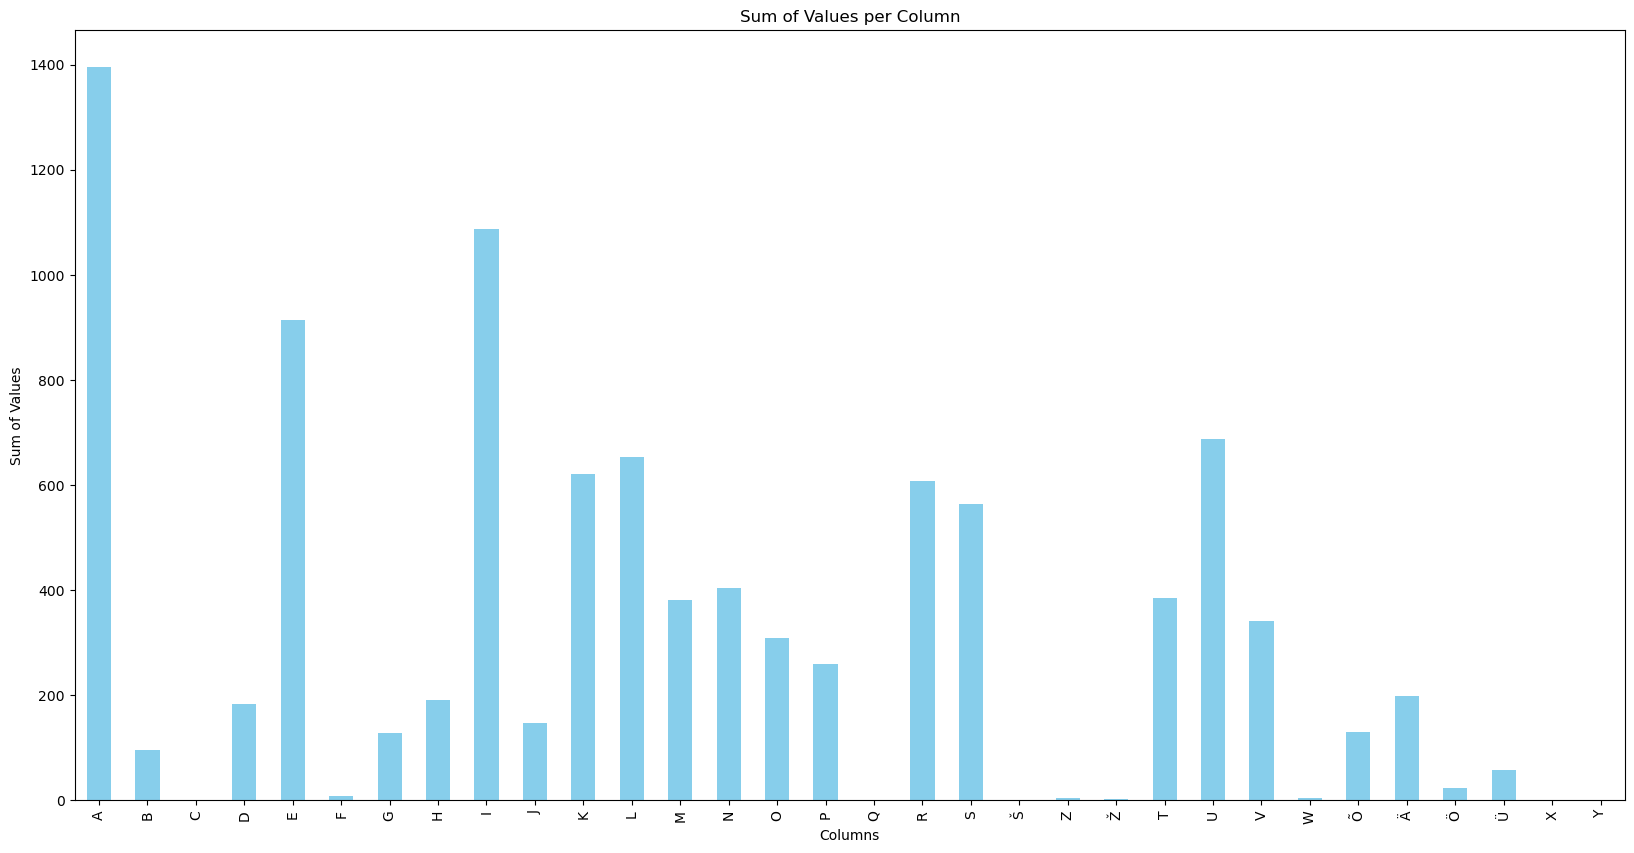

In [13]:
import matplotlib.pyplot as plt

# Since df12 has a single row, we'll select that row for plotting
row_for_plotting = df11.iloc[0]

# Create a bar plot using the data
plt.figure(figsize=(20, 10))  # Adjust the size as needed
row_for_plotting.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Sum of Values per Column')
plt.xlabel('Columns')
plt.ylabel('Sum of Values')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

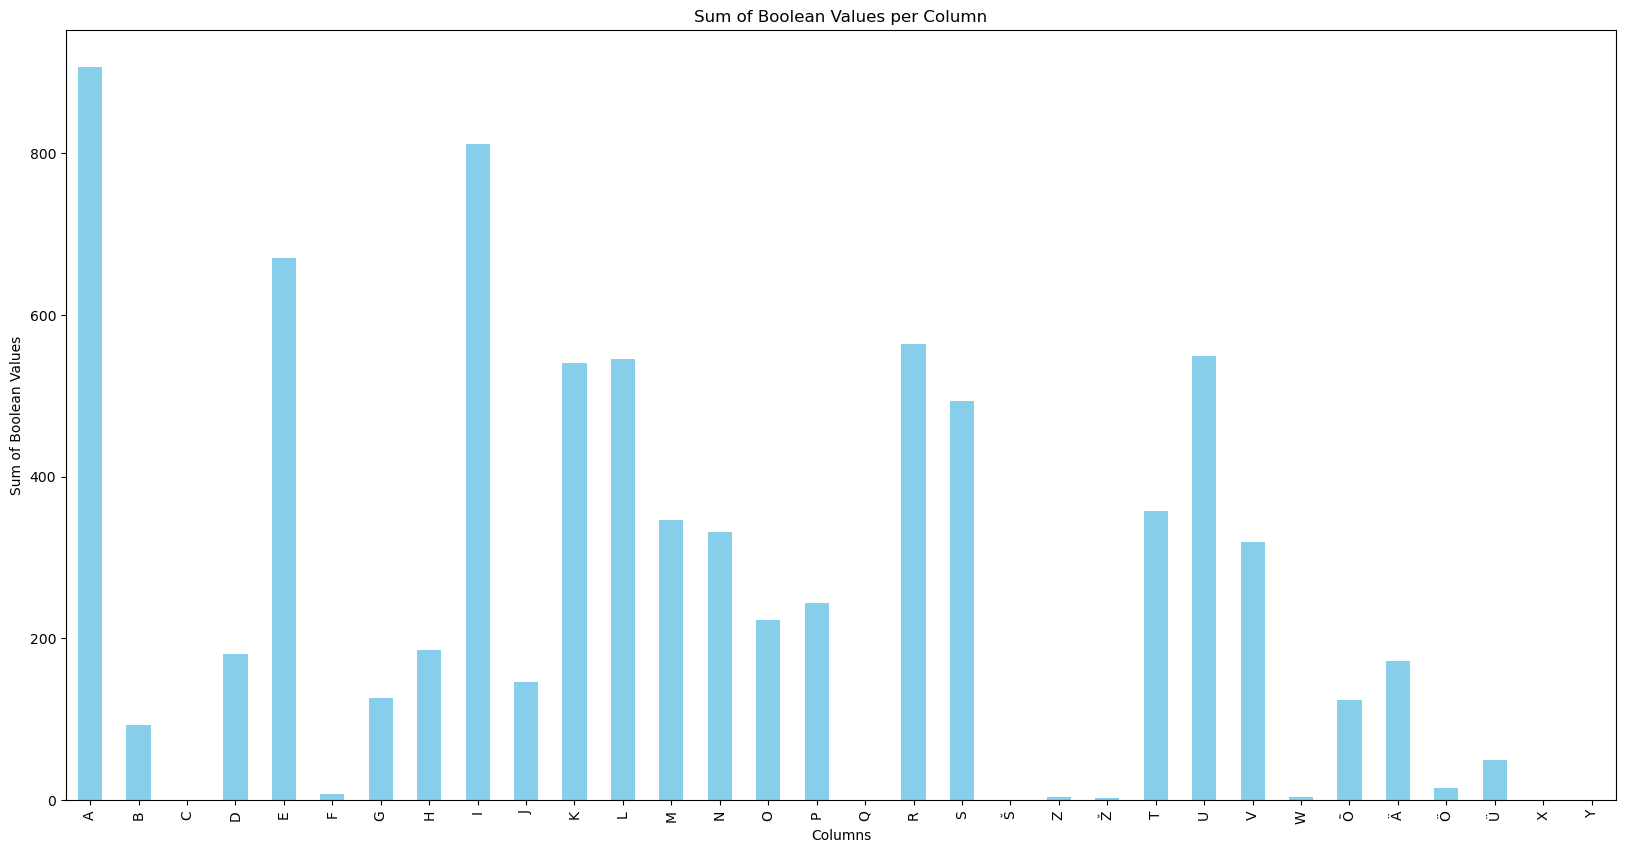

In [14]:
import matplotlib.pyplot as plt

# Since df12 has a single row, we'll select that row for plotting
row_for_plotting = df12.iloc[0]

# Create a bar plot using the data
plt.figure(figsize=(20, 10))  # Adjust the size as needed
row_for_plotting.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Sum of Boolean Values per Column')
plt.xlabel('Columns')
plt.ylabel('Sum of Boolean Values')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [15]:
# Assuming df12 is already created and is available in the environment
# We will first sort the values in df12 in descending order
sorted_values = df11.iloc[0].sort_values(ascending=False)

# Extract the sorted column names
sorted_column_names = sorted_values.index.tolist()

# Split the sorted column names into two halves
first_half = sorted_column_names[1::2]  # This will be placed on the left side (in reverse order)
second_half = sorted_column_names[::2]  # This will be placed on the right side

# Reverse the first half to start with the second highest value
first_half = first_half[::-1]

# Calculate the middle index
middle_index = len(sorted_column_names) // 2

# Initialize a list for the new column order
new_column_order = [None] * len(sorted_column_names)

# Place the first half in reverse order to the left side of the middle index
new_column_order[middle_index - len(first_half): middle_index] = first_half

# Place the second half in order to the right side of the middle index
new_column_order[middle_index: middle_index + len(second_half)] = second_half

# Filter out any None values that may have been inserted in the new_column_order list
new_column_order = [col for col in new_column_order if col is not None]

# Create the new dataframe df21 with columns ordered as specified
df21 = df11[new_column_order]

# Display the new dataframe df21
df21


,Y,Š,X,W,F,Ü,G,J,H,P,...,O,Ä,D,Õ,B,Ö,Z,Ž,Q,C
0,0,0,0,4,8,58,127,146,190,258,...,308,197,183,130,96,23,4,2,0,0


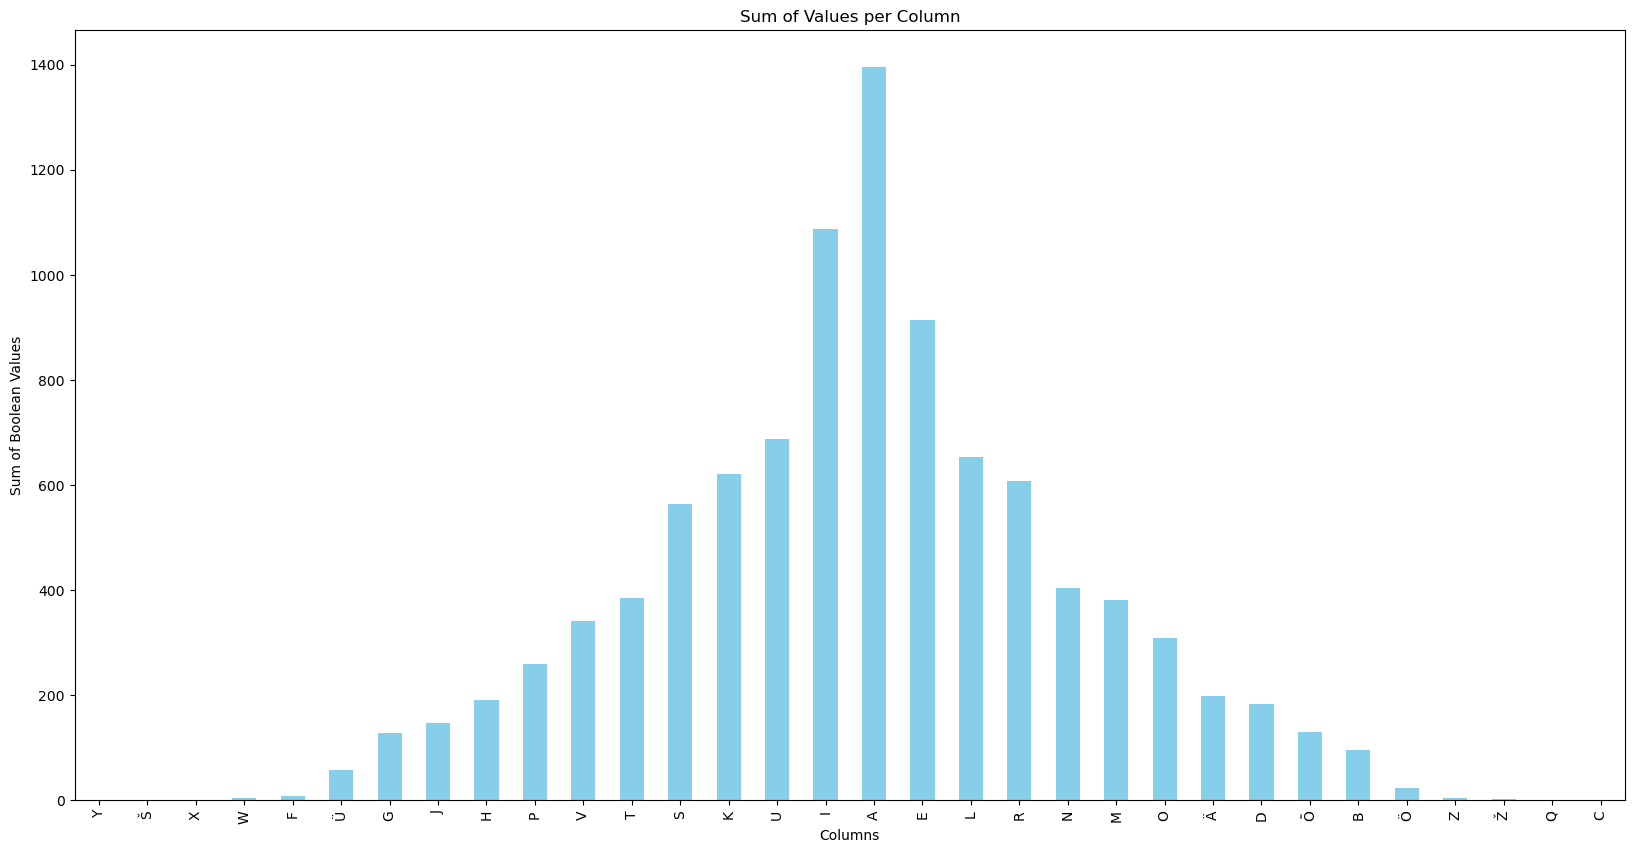

In [16]:
# Since df21 has a single row, we'll select that row for plotting
row_for_plotting = df21.iloc[0]

# Create a bar plot using the data
plt.figure(figsize=(20, 10))  # Adjust the size as needed
row_for_plotting.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Sum of Values per Column')
plt.xlabel('Columns')
plt.ylabel('Sum of Boolean Values')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [17]:
# Assuming df12 is already created and is available in the environment
# We will first sort the values in df12 in descending order
sorted_values = df12.iloc[0].sort_values(ascending=False)

# Extract the sorted column names
sorted_column_names = sorted_values.index.tolist()

# Split the sorted column names into two halves
first_half = sorted_column_names[1::2]  # This will be placed on the left side (in reverse order)
second_half = sorted_column_names[::2]  # This will be placed on the right side

# Reverse the first half to start with the second highest value
first_half = first_half[::-1]

# Calculate the middle index
middle_index = len(sorted_column_names) // 2

# Initialize a list for the new column order
new_column_order = [None] * len(sorted_column_names)

# Place the first half in reverse order to the left side of the middle index
new_column_order[middle_index - len(first_half): middle_index] = first_half

# Place the second half in order to the right side of the middle index
new_column_order[middle_index: middle_index + len(second_half)] = second_half

# Filter out any None values that may have been inserted in the new_column_order list
new_column_order = [col for col in new_column_order if col is not None]

# Create the new dataframe df22 with columns ordered as specified
df22 = df12[new_column_order]

# Display the new dataframe df22
df22

,Y,Š,X,W,F,Ü,Õ,J,D,O,...,P,H,Ä,G,B,Ö,Z,Ž,Q,C
0,0,0,0,4,8,50,124,146,181,223,...,244,186,172,126,93,15,4,2,0,0


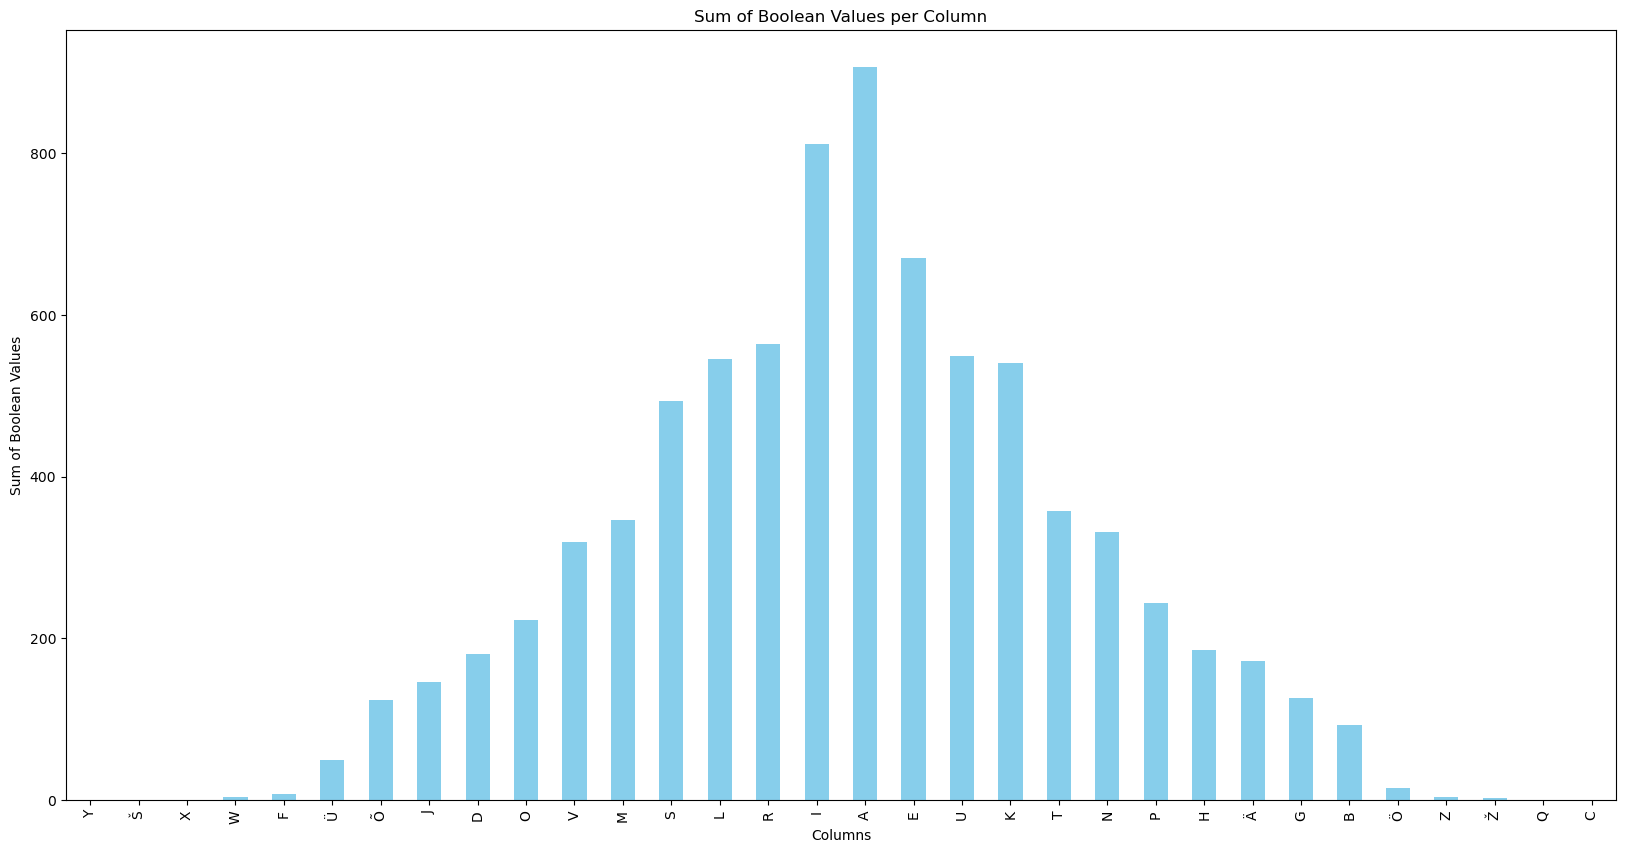

In [18]:
# Since df22 has a single row, we'll select that row for plotting
row_for_plotting = df22.iloc[0]

# Create a bar plot using the data
plt.figure(figsize=(20, 10))  # Adjust the size as needed
row_for_plotting.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Sum of Boolean Values per Column')
plt.xlabel('Columns')
plt.ylabel('Sum of Boolean Values')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [19]:
# Calculate the minimum, average, and maximum of the 'Pikkus' column
pikkus_min = df3['Pikkus'].min()
pikkus_avg = df3['Pikkus'].mean()
pikkus_max = df3['Pikkus'].max()

# Display the results
display(f"Minimum: {pikkus_min}")
display(f"Average: {round(pikkus_avg)}")
display(f"Maximum: {pikkus_max}")

'Minimum: 2'

'Average: 7'

'Maximum: 16'